In [264]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
from pandas.plotting import parallel_coordinates

In [265]:
# Reading the data into a DataFrame
ambdata = pd.read_csv('annual_ambulance_data.csv',encoding = 'ISO-8859-1')
ambdata = ambdata.set_index('LGA')

profiles = pd.read_csv('lga_profile.csv',encoding = 'ISO-8859-1')
profiles = profiles.set_index('LGA')

#Concatenating the two datasets
lgadata = pd.concat([ambdata, profiles], axis=1)
lgadata


,Perc_under_15mins,AVG_RT_sec,Total_calls,MetropolitanRural,Departmental_region,Area_of_LGA_sq_km,Distance_to_Melbourne_in_km,Travel_time_from_Melbourne_mins,Remoteness_category,Population,Number_of_hospitals,Number_of_public_hospitals,Number_of_private_hospitals,Ppl_who_live_near_public_transport_percent,Median_household_income_aud,Hosp_admiss_per_1000_pop
Alpine (S),37.6,1317,622,Rural,Hume,4787,286,201,Outer Regional Australia,12044,3,3,0,3.0,829,414.4
Ararat (RC),60.0,1025,660,Rural,Grampians,4210,200,143,Outer Regional Australia,11207,2,2,0,48.3,844,462.5
Ballarat (C),80.4,734,5889,Rural,Grampians,739,115,76,Inner Regional Australia,98684,5,2,3,67.4,988,476.2
Banyule (C),83.1,698,5949,Metropolitan,Northern Metropolitan,63,23,25,Major Cities of Australia,124475,8,3,5,90.4,1394,442.3
Bass Coast (S),60.5,934,2692,Rural,Gippsland,865,130,111,Inner Regional Australia,31010,1,1,0,36.7,855,482.5
Baw Baw (S),46.5,1162,2641,Rural,Gippsland,4031,102,74,Inner Regional Australia,45205,2,1,1,20.9,1025,394.1
Bayside (C),81.8,760,4178,Metropolitan,Southern Metropolitan,37,12,15,Major Cities of Australia,98368,7,2,5,96.6,1826,513.2
Benalla (RC),60.5,1003,826,Rural,Hume,2352,199,136,Inner Regional Australia,13719,1,1,0,41.2,827,518.9
Boroondara (C),86.0,697,6148,Metropolitan,Eastern Metropolitan,60,12,13,Major Cities of Australia,170553,15,4,11,100.0,1893,413.8
Brimbank (C),76.6,768,10718,Metropolitan,Western Metropolitan,123,19,19,Major Cities of Australia,195469,5,1,4,84.0,1106,413.8


In [266]:
#Creates a new row Demand as the number of calls per 1000 people
#Creates a new row Population Density
#Creates a new row Hospital Density
lgadata['Pop_den'] = lgadata['Population']/lgadata['Area_of_LGA_sq_km']
lgadata['Hosp_den'] = lgadata['Number_of_hospitals']/lgadata['Area_of_LGA_sq_km']
lgadata['Demand'] = lgadata['Total_calls']/(lgadata['Population']/1000)

#Calculating percentage of high demand LGAs (>65 calls per 1000 people) that have less than 60% of trips under 15 mins
highdemand = lgadata[lgadata['Demand']>65]
lowrt = highdemand[highdemand['Perc_under_15mins']<60]
ratio = 100*len(lowrt)/len(highdemand)
print(ratio)

#47% of LGA's with high demand have less than 60% of their trips under 60 mins

47.05882352941177


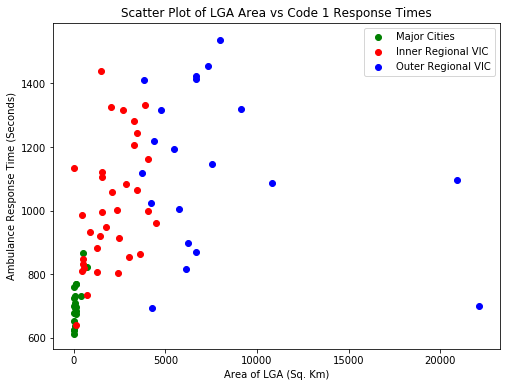

In [279]:
#Scatter plot of LGA Area vs Avg Response Time
cities=lgadata.loc[lgadata["Remoteness_category"]=='Major Cities of Australia']
inner_region=lgadata.loc[lgadata["Remoteness_category"]=='Inner Regional Australia']
outer_region=lgadata.loc[lgadata["Remoteness_category"]=='Outer Regional Australia']

a='Area_of_LGA_sq_km'
b='AVG_RT_sec'

plt.scatter(cities.loc[:,a],cities.loc[:,b],color='green', label='Major Cities')
plt.scatter(inner_region.loc[:,a],inner_region.loc[:,b],color='red', label = 'Inner Regional VIC')
plt.scatter(outer_region.loc[:,a],outer_region.loc[:,b],color='blue', label = 'Outer Regional VIC')

plt.legend() #Show legend
plt.ylabel("Ambulance Response Time (Seconds)")
plt.xlabel("Area of LGA (Sq. Km)")
plt.title("Scatter Plot of LGA Area vs Code 1 Response Times")
plt.show()

In [268]:
plt.rcParams['figure.figsize'] = (16, 6)

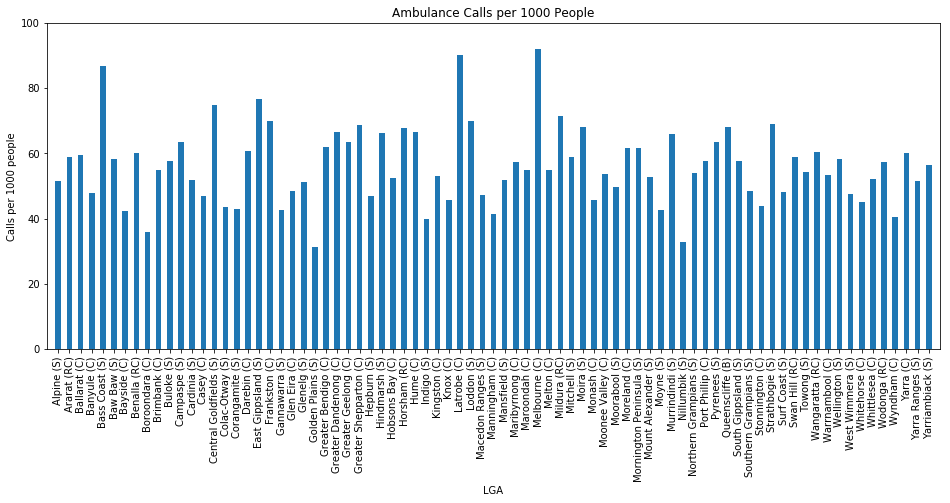

In [269]:
#Plots a bar chart of the number of ambulance calls per 1000 people in each LGA
demand = lgadata["Demand"].tolist()
lganames = lgadata.index

plt.bar(arange(79), demand, width = 0.5)
plt.ylim(0,100)
plt.xlim(-1, 79)
plt.xticks(arange(79), lganames, rotation = 90)
plt.ylabel("Calls per 1000 people")
plt.xlabel("LGA")
plt.title("Ambulance Calls per 1000 People")
plt.figure(figsize=(1,1))

plt.show()


In [255]:
# Calculates the pearson correlation coefficient of the following features
Features = ['Area_of_LGA_sq_km','Pop_den','Travel_time_from_Melbourne_mins','Hosp_den','Ppl_who_live_near_public_transport_percent','Median_household_income_aud','Hosp_admiss_per_1000_pop','Demand']
X = 'AVG_RT_sec'
featdict = {}

for i in Features:
    featdict[i] = lgadata[X].corr(lgadata[i])

# Creating a dataframe of pearson r
pearsonDF = pd.DataFrame({'Pearson r': featdict})
pearsonDF.sort_values('Pearson r')


,Pearson r
Ppl_who_live_near_public_transport_percent,-0.894530
Pop_den,-0.614495
Median_household_income_aud,-0.587706
Hosp_den,-0.482288
Demand,-0.066134
Hosp_admiss_per_1000_pop,0.181983
Area_of_LGA_sq_km,0.402418
Travel_time_from_Melbourne_mins,0.471571


In [187]:
def normalize(rawData,feature):
    '''
    (DataFrame, str) -> Series
    Returns the normalized values for a given feature
    '''
    maxval = rawData[feature].max()
    minval = rawData[feature].min()
    normalizedvals = (rawData[feature] - minval)/(maxval-minval)
    
    return normalizedvals

In [216]:
def categorize(row):
    '''
    Takes a row in a dataframe and returns its bin category
    '''
    if row['MetropolitanRural'] == 'Metropolitan':
        val = 'Metropolitan'
    elif row['AVG_RT_sec'] <= 900:
        val = 'Rural Low RT'
    else:
        val = 'Rural High RT'
    return val

In [270]:
plt.rcParams['figure.figsize'] = (14,8)

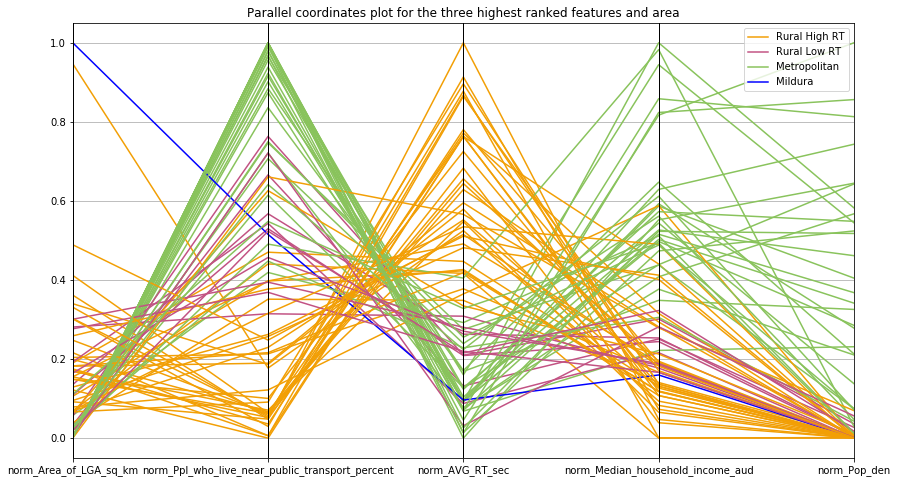

In [262]:
# Normalise features between 0 and 1, to ensure comparability of axes
features = ['Ppl_who_live_near_public_transport_percent','Pop_den','Median_household_income_aud','Area_of_LGA_sq_km','AVG_RT_sec']
for feature in features:
    lgadata['norm_'+feature] = normalize(lgadata, feature)

# Creating a new column for category
lgadata['bin'] = lgadata.apply(categorize, axis=1)
lgadata.loc[['Mildura (RC)'],'bin'] = 'Mildura'

# Draw a parallel coordinates plot with 79 lines for each LGA
# Different colored lines for different category
parallel_coordinates(lgadata[['norm_Area_of_LGA_sq_km','norm_Ppl_who_live_near_public_transport_percent','norm_AVG_RT_sec','norm_Median_household_income_aud','norm_Pop_den','bin']],'bin', color = ['#F29F05','#C25283','#89C35C','b'])
plt.title("Parallel coordinates plot for the three highest ranked features and area")
plt.show()

In [276]:
plt.rcParams['figure.figsize'] = (8,6)

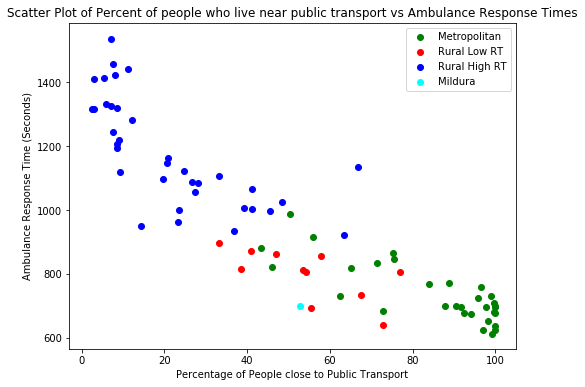

In [277]:
#Scatter plot of LGA Area vs Avg Response Time

a=features[0] #Ppl_who_live_near_public_transport_percent
b='AVG_RT_sec'

plt.scatter(metro.loc[:,a],metro.loc[:,b],color='green', label='Metropolitan')
plt.scatter(rural_lowRT.loc[:,a],rural_lowRT.loc[:,b],color='red', label = 'Rural Low RT')
plt.scatter(rural_highRT.loc[:,a],rural_highRT.loc[:,b],color='blue', label = 'Rural High RT')
plt.scatter(mildura.iloc[0][a],mildura.iloc[0][b],color='cyan', label = 'Mildura')

plt.legend() #Show legend
plt.ylabel("Ambulance Response Time (Seconds)")
plt.xlabel("Percentage of People close to Public Transport")
plt.title("Scatter Plot of Percent of people who live near public transport vs Ambulance Response Times")
plt.show()